# Analyse des données de vol

## Import des packages et des données

In [58]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display

In [59]:
df_dep_flights = pd.read_csv("../data/2_interim/FRA_flightstatus_dep_flights_2024-09-06_conso_flatten.csv")
df_dep_flights.head(5)

,Departure_AirportCode,Departure_ScheduledTimeLocal_DateTime,Departure_ScheduledTimeUTC_DateTime,Departure_ActualTimeLocal_DateTime,Departure_ActualTimeUTC_DateTime,Departure_TimeStatus_Code,Departure_TimeStatus_Definition,Departure_Terminal_Name,Departure_Terminal_Gate,Arrival_AirportCode,...,Equipment_AircraftCode,Equipment_AircraftRegistration,FlightStatus_Code,FlightStatus_Definition,ServiceType,Arrival_Terminal_Gate,Arrival_EstimatedTimeLocal_DateTime,Arrival_EstimatedTimeUTC_DateTime,Departure_EstimatedTimeLocal_DateTime,Departure_EstimatedTimeUTC_DateTime
0,FRA,2024-09-06T04:45,2024-09-06T02:45Z,2024-09-06T04:53,2024-09-06T02:53Z,OT,Flight On Time,1.0,B47,AYT,...,32A,DAIUV,LD,Flight Landed,Passenger,NaN,NaN,NaN,NaN,NaN
1,FRA,2024-09-06T04:45,2024-09-06T02:45Z,2024-09-06T04:45,2024-09-06T02:45Z,OT,Flight On Time,1.0,A14,PMI,...,32Q,DANMX,LD,Flight Landed,Passenger,NaN,NaN,NaN,NaN,NaN
2,FRA,2024-09-06T04:50,2024-09-06T02:50Z,2024-09-06T04:46,2024-09-06T02:46Z,FE,Flight Early,1.0,A11,HER,...,320,DAICU,LD,Flight Landed,Passenger,NaN,NaN,NaN,NaN,NaN
3,FRA,2024-09-06T04:50,2024-09-06T02:50Z,2024-09-06T04:47,2024-09-06T02:47Z,FE,Flight Early,1.0,A16,OLB,...,32B,DATCF,LD,Flight Landed,Passenger,NaN,NaN,NaN,NaN,NaN
4,FRA,2024-09-06T05:00,2024-09-06T03:00Z,2024-09-06T04:57,2024-09-06T02:57Z,FE,Flight Early,1.0,A01,RHO,...,32A,DAIUZ,LD,Flight Landed,Passenger,NaN,NaN,NaN,NaN,NaN


## Nettoyage préliminaire

In [60]:
# Vérification que toutes les variables de dates soient bien présentes et conversion en datetime

def align_date_variables(df):
    df_new = df.copy()
    for moment in ["Departure", "Arrival"]:
        for time_type in ["Scheduled", "Estimated", "Actual"]:
            for time_zone in ["UTC", "Local"]:
                if (col := f"{moment}_{time_type}Time{time_zone}_DateTime") not in df_new.columns:
                    df_new[col] = np.nan
                    print(f"Addition of {col = }")
                df_new[col] = pd.to_datetime(df_new[col])
    return df_new

df_dep_flights_clean = align_date_variables(df_dep_flights)

df_dep_flights_clean.head()

,Departure_AirportCode,Departure_ScheduledTimeLocal_DateTime,Departure_ScheduledTimeUTC_DateTime,Departure_ActualTimeLocal_DateTime,Departure_ActualTimeUTC_DateTime,Departure_TimeStatus_Code,Departure_TimeStatus_Definition,Departure_Terminal_Name,Departure_Terminal_Gate,Arrival_AirportCode,...,Equipment_AircraftCode,Equipment_AircraftRegistration,FlightStatus_Code,FlightStatus_Definition,ServiceType,Arrival_Terminal_Gate,Arrival_EstimatedTimeLocal_DateTime,Arrival_EstimatedTimeUTC_DateTime,Departure_EstimatedTimeLocal_DateTime,Departure_EstimatedTimeUTC_DateTime
0,FRA,2024-09-06 04:45:00,2024-09-06 02:45:00+00:00,2024-09-06 04:53:00,2024-09-06 02:53:00+00:00,OT,Flight On Time,1.0,B47,AYT,...,32A,DAIUV,LD,Flight Landed,Passenger,NaN,NaT,NaT,NaT,NaT
1,FRA,2024-09-06 04:45:00,2024-09-06 02:45:00+00:00,2024-09-06 04:45:00,2024-09-06 02:45:00+00:00,OT,Flight On Time,1.0,A14,PMI,...,32Q,DANMX,LD,Flight Landed,Passenger,NaN,NaT,NaT,NaT,NaT
2,FRA,2024-09-06 04:50:00,2024-09-06 02:50:00+00:00,2024-09-06 04:46:00,2024-09-06 02:46:00+00:00,FE,Flight Early,1.0,A11,HER,...,320,DAICU,LD,Flight Landed,Passenger,NaN,NaT,NaT,NaT,NaT
3,FRA,2024-09-06 04:50:00,2024-09-06 02:50:00+00:00,2024-09-06 04:47:00,2024-09-06 02:47:00+00:00,FE,Flight Early,1.0,A16,OLB,...,32B,DATCF,LD,Flight Landed,Passenger,NaN,NaT,NaT,NaT,NaT
4,FRA,2024-09-06 05:00:00,2024-09-06 03:00:00+00:00,2024-09-06 04:57:00,2024-09-06 02:57:00+00:00,FE,Flight Early,1.0,A01,RHO,...,32A,DAIUZ,LD,Flight Landed,Passenger,NaN,NaT,NaT,NaT,NaT


In [61]:
# Suppression des variables de temps en heure locale

def remove_local_time_variables(df):
    df_new = df.copy()
    for moment in ["Departure", "Arrival"]:
        for time_type in ["Scheduled", "Estimated", "Actual"]:
            if (col := f"{moment}_{time_type}TimeLocal_DateTime") in df_new.columns:
                df_new = df_new.drop(col, axis=1)
                print(f"Removal of {col = }")
    return df_new

df_dep_flights_clean = remove_local_time_variables(df_dep_flights_clean)
df_dep_flights_clean.head()

Removal of col = 'Departure_ScheduledTimeLocal_DateTime'
Removal of col = 'Departure_EstimatedTimeLocal_DateTime'
Removal of col = 'Departure_ActualTimeLocal_DateTime'
Removal of col = 'Arrival_ScheduledTimeLocal_DateTime'
Removal of col = 'Arrival_EstimatedTimeLocal_DateTime'
Removal of col = 'Arrival_ActualTimeLocal_DateTime'


,Departure_AirportCode,Departure_ScheduledTimeUTC_DateTime,Departure_ActualTimeUTC_DateTime,Departure_TimeStatus_Code,Departure_TimeStatus_Definition,Departure_Terminal_Name,Departure_Terminal_Gate,Arrival_AirportCode,Arrival_ScheduledTimeUTC_DateTime,Arrival_ActualTimeUTC_DateTime,...,OperatingCarrier_AirlineID,OperatingCarrier_FlightNumber,Equipment_AircraftCode,Equipment_AircraftRegistration,FlightStatus_Code,FlightStatus_Definition,ServiceType,Arrival_Terminal_Gate,Arrival_EstimatedTimeUTC_DateTime,Departure_EstimatedTimeUTC_DateTime
0,FRA,2024-09-06 02:45:00+00:00,2024-09-06 02:53:00+00:00,OT,Flight On Time,1.0,B47,AYT,2024-09-06 06:10:00+00:00,2024-09-06 06:26:00+00:00,...,4Y,1600,32A,DAIUV,LD,Flight Landed,Passenger,NaN,NaT,NaT
1,FRA,2024-09-06 02:45:00+00:00,2024-09-06 02:45:00+00:00,OT,Flight On Time,1.0,A14,PMI,2024-09-06 04:50:00+00:00,2024-09-06 04:59:00+00:00,...,DE,1502,32Q,DANMX,LD,Flight Landed,Passenger,NaN,NaT,NaT
2,FRA,2024-09-06 02:50:00+00:00,2024-09-06 02:46:00+00:00,FE,Flight Early,1.0,A11,HER,2024-09-06 05:55:00+00:00,2024-09-06 05:53:00+00:00,...,DE,1662,320,DAICU,LD,Flight Landed,Passenger,NaN,NaT,NaT
3,FRA,2024-09-06 02:50:00+00:00,2024-09-06 02:47:00+00:00,FE,Flight Early,1.0,A16,OLB,2024-09-06 04:45:00+00:00,2024-09-06 04:33:00+00:00,...,DE,1808,32B,DATCF,LD,Flight Landed,Passenger,NaN,NaT,NaT
4,FRA,2024-09-06 03:00:00+00:00,2024-09-06 02:57:00+00:00,FE,Flight Early,1.0,A01,RHO,2024-09-06 06:05:00+00:00,2024-09-06 06:03:00+00:00,...,4Y,1200,32A,DAIUZ,LD,Flight Landed,Passenger,NaN,NaT,NaT


## Description des données

In [62]:
# Description générale des données
df_dep_flights_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype              
---  ------                               --------------  -----              
 0   Departure_AirportCode                597 non-null    object             
 1   Departure_ScheduledTimeUTC_DateTime  597 non-null    datetime64[ns, UTC]
 2   Departure_ActualTimeUTC_DateTime     589 non-null    datetime64[ns, UTC]
 3   Departure_TimeStatus_Code            597 non-null    object             
 4   Departure_TimeStatus_Definition      597 non-null    object             
 5   Departure_Terminal_Name              588 non-null    float64            
 6   Departure_Terminal_Gate              596 non-null    object             
 7   Arrival_AirportCode                  597 non-null    object             
 8   Arrival_ScheduledTimeUTC_DateTime    597 non-null    datetime64[ns, UTC]
 9   Arrival_ActualTimeUTC_DateTime  

In [63]:
# Vérification de l'occurrence des modalités pour les statuts de vol
for col in ["Departure_TimeStatus_Definition", "Arrival_TimeStatus_Definition", "FlightStatus_Definition"]:
    display(df_dep_flights_clean[col].value_counts())
    na_num = df_dep_flights_clean[col].isna().sum()
    print(f"Number of NaN for '{col}': {na_num}")

Departure_TimeStatus_Definition
Flight On Time    349
Flight Delayed    215
Flight Early       30
No status           3
Name: count, dtype: int64

Number of NaN for 'Departure_TimeStatus_Definition': 0


Arrival_TimeStatus_Definition
Flight Delayed    246
Flight On Time    239
Flight Early      109
No status           3
Name: count, dtype: int64

Number of NaN for 'Arrival_TimeStatus_Definition': 0


FlightStatus_Definition
Flight Landed       532
Flight Departed      55
No status             7
Flight Diverted       2
Flight Cancelled      1
Name: count, dtype: int64

Number of NaN for 'FlightStatus_Definition': 0


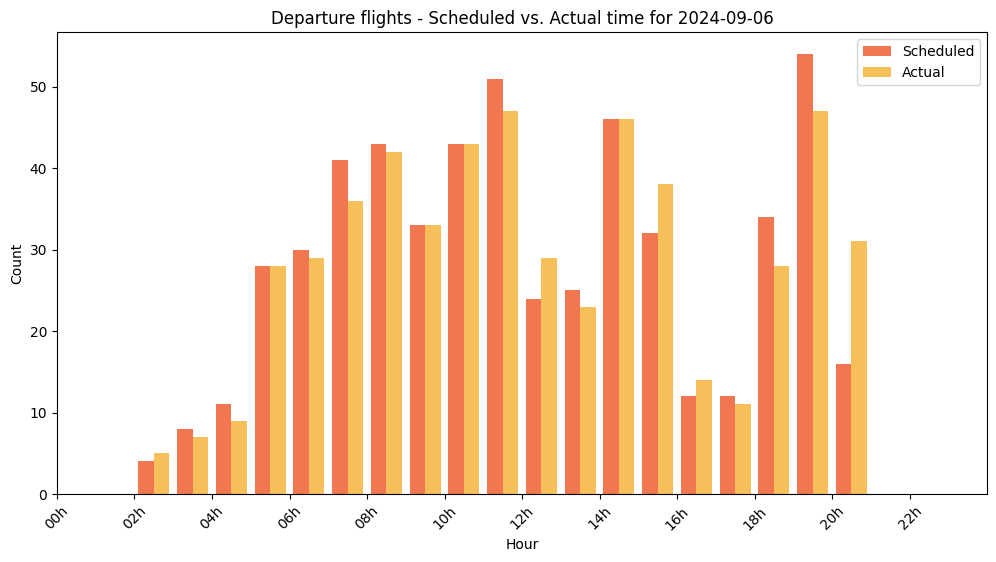

In [134]:
def compare_departing_flights_per_hour(df):
    fig, ax = plt.subplots(figsize=(12, 6))

    date_day = df.loc[0, "Departure_ScheduledTimeUTC_DateTime"].strftime("%Y-%m-%d")
    day_start = pd.Timestamp(f"{date_day} 00:00")
    day_end = pd.Timestamp(f"{date_day} 23:59")

    cols = ["Departure_ScheduledTimeUTC_DateTime", "Departure_ActualTimeUTC_DateTime"]
    df_new = df.dropna(axis=0, how="any", subset=cols)
    
    ax.hist([df_new[cols[0]], df_new[cols[1]]], 
        bins=24, rwidth=0.8, color = ["#f27750", "#f7bf59"], label = ["Scheduled", "Actual"],
        range=[mdates.date2num(day_start), mdates.date2num(day_end)])
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Hh'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))

    ax.set_xlim(day_start, day_end)


    ax.tick_params(axis='x', rotation=45)

    # Ajouter des labels et un titre
    ax.set_xlabel("Hour")
    ax.set_ylabel("Count")
    ax.set_title(f"Departure flights - Scheduled vs. Actual time for {date_day}")
    ax.legend();

compare_departing_flights_per_hour(df_dep_flights_clean)

## Analyse des duplicatas

In [66]:
print(f"Nombre de duplicatas : {df_dep_flights_clean.duplicated().sum()}")

Nombre de duplicatas : 42


In [67]:
# Analyse des vols dupliqués - a priori, pas de pattern
df_dep_flights_clean.loc[df_dep_flights_clean.duplicated(keep=False)].sort_values(by=["Departure_ActualTimeUTC_DateTime", "Departure_ScheduledTimeUTC_DateTime"]).head(12)

,Departure_AirportCode,Departure_ScheduledTimeUTC_DateTime,Departure_ActualTimeUTC_DateTime,Departure_TimeStatus_Code,Departure_TimeStatus_Definition,Departure_Terminal_Name,Departure_Terminal_Gate,Arrival_AirportCode,Arrival_ScheduledTimeUTC_DateTime,Arrival_ActualTimeUTC_DateTime,...,OperatingCarrier_AirlineID,OperatingCarrier_FlightNumber,Equipment_AircraftCode,Equipment_AircraftRegistration,FlightStatus_Code,FlightStatus_Definition,ServiceType,Arrival_Terminal_Gate,Arrival_EstimatedTimeUTC_DateTime,Departure_EstimatedTimeUTC_DateTime
49,FRA,2024-09-06 05:55:00+00:00,2024-09-06 06:04:00+00:00,OT,Flight On Time,1.0,A03,GOT,2024-09-06 07:30:00+00:00,2024-09-06 07:34:00+00:00,...,LH,812,CR9,DACNE,LD,Flight Landed,Passenger,NaN,NaT,NaT
55,FRA,2024-09-06 05:55:00+00:00,2024-09-06 06:04:00+00:00,OT,Flight On Time,1.0,A03,GOT,2024-09-06 07:30:00+00:00,2024-09-06 07:34:00+00:00,...,LH,812,CR9,DACNE,LD,Flight Landed,Passenger,NaN,NaT,NaT
52,FRA,2024-09-06 06:00:00+00:00,2024-09-06 06:10:00+00:00,OT,Flight On Time,1.0,B47,LHR,2024-09-06 07:40:00+00:00,2024-09-06 08:05:00+00:00,...,LH,900,32N,DAINA,LD,Flight Landed,Passenger,NaN,NaT,NaT
56,FRA,2024-09-06 06:00:00+00:00,2024-09-06 06:10:00+00:00,OT,Flight On Time,1.0,B47,LHR,2024-09-06 07:40:00+00:00,2024-09-06 08:05:00+00:00,...,LH,900,32N,DAINA,LD,Flight Landed,Passenger,NaN,NaT,NaT
48,FRA,2024-09-06 05:50:00+00:00,2024-09-06 06:12:00+00:00,DL,Flight Delayed,1.0,A14,ZRH,2024-09-06 06:45:00+00:00,2024-09-06 07:01:00+00:00,...,LH,1184,319,DAIBA,LD,Flight Landed,Passenger,NaN,NaT,NaT
54,FRA,2024-09-06 05:50:00+00:00,2024-09-06 06:12:00+00:00,DL,Flight Delayed,1.0,A14,ZRH,2024-09-06 06:45:00+00:00,2024-09-06 07:01:00+00:00,...,LH,1184,319,DAIBA,LD,Flight Landed,Passenger,NaN,NaT,NaT
53,FRA,2024-09-06 06:00:00+00:00,2024-09-06 06:27:00+00:00,DL,Flight Delayed,1.0,B44,AYT,2024-09-06 09:30:00+00:00,2024-09-06 09:54:00+00:00,...,XQ,141,7M8,TCSOI,LD,Flight Landed,Passenger,NaN,NaT,NaT
57,FRA,2024-09-06 06:00:00+00:00,2024-09-06 06:27:00+00:00,DL,Flight Delayed,1.0,B44,AYT,2024-09-06 09:30:00+00:00,2024-09-06 09:54:00+00:00,...,XQ,141,7M8,TCSOI,LD,Flight Landed,Passenger,NaN,NaT,NaT
194,FRA,2024-09-06 09:40:00+00:00,2024-09-06 10:00:00+00:00,DL,Flight Delayed,1.0,B33,SKP,2024-09-06 11:55:00+00:00,2024-09-06 12:14:00+00:00,...,LH,1540,319,DAIBA,LD,Flight Landed,Passenger,NaN,NaT,NaT
213,FRA,2024-09-06 09:40:00+00:00,2024-09-06 10:00:00+00:00,DL,Flight Delayed,1.0,B33,SKP,2024-09-06 11:55:00+00:00,2024-09-06 12:14:00+00:00,...,LH,1540,319,DAIBA,LD,Flight Landed,Passenger,NaN,NaT,NaT


**Conclusion :** 
Il n'y a, a priori, rien n'indique que ces duplicatas puissent être causés par une erreur lors de l'ingestion (pas de phénomène récurrent au niveau des indexes)

Il est donc décidé de supprimer les duplicatas.

In [68]:
print(f"Shape avant suppression des duplicatas : {df_dep_flights_clean.shape}")
print(f"Nombre de duplicatas avant suppression : {df_dep_flights_clean.duplicated().sum()}")

def remove_duplicates(df):
    return df[~df.duplicated()]

df_dep_flights_clean = remove_duplicates(df_dep_flights_clean)

print(f"Shape après suppression des duplicatas : {df_dep_flights_clean.shape}")
print(f"Nombre de duplicatas après suppression : {df_dep_flights_clean.duplicated().sum()}")

Shape avant suppression des duplicatas : (597, 25)
Nombre de duplicatas avant suppression : 42
Shape après suppression des duplicatas : (555, 25)
Nombre de duplicatas après suppression : 0


## Analyse de corrélation :

- durée vs retard
- compagnie aérienne vs retard
- type d'avion vs retard

### Analyse : durée du vol vs. retard

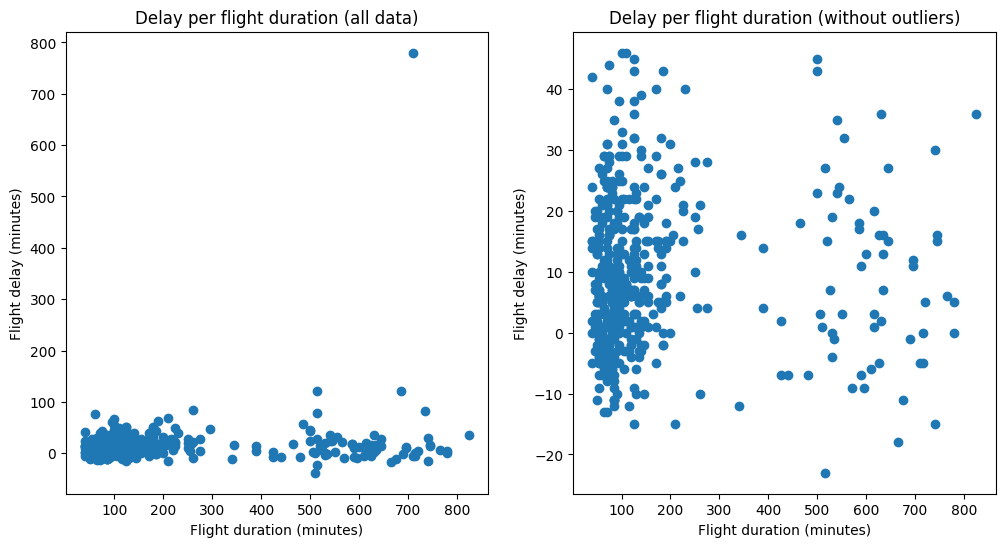

In [132]:
def compare_duration_vs_delay(df: pd.DataFrame):
    df_new = df.dropna(axis=0, how="any", subset=["Arrival_ActualTimeUTC_DateTime"]).copy()

    df_new["Duration"] = df_new["Arrival_ScheduledTimeUTC_DateTime"] - df_new["Departure_ScheduledTimeUTC_DateTime"]
    df_new["Delay"] = df_new["Arrival_ActualTimeUTC_DateTime"] - df_new["Arrival_ScheduledTimeUTC_DateTime"]

    for col in ["Duration", "Delay"]:
        df_new.loc[:, f"{col}_min"] = df_new[col].apply(lambda x: (x.total_seconds() / 60))

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    ax[0].scatter(df_new["Duration_min"], df_new["Delay_min"])
    ax[0].set_xlabel("Flight duration (minutes)")
    ax[0].set_ylabel("Flight delay (minutes)")
    ax[0].set_title(f"Delay per flight duration (all data)")

    Q1 = df_new["Delay_min"].quantile(0.25)
    Q3 = df_new["Delay_min"].quantile(0.75)
    
    # Calculer l'IQR
    IQR = Q3 - Q1
    
    # Définir les seuils pour les outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrer les données
    df_filtered = df_new[(df_new["Delay_min"] >= lower_bound) & (df_new["Delay_min"] <= upper_bound)]

    ax[1].scatter(df_filtered["Duration_min"], df_filtered["Delay_min"])
    ax[1].set_xlabel("Flight duration (minutes)")
    ax[1].set_ylabel("Flight delay (minutes)")
    ax[1].set_title(f"Delay per flight duration (without outliers)")

compare_duration_vs_delay(df_dep_flights_clean);

Aucune corrélation ne semble évidente entre la durée du vol et le retard

### Analyse : compagnie aérienne vs. retard

# Brouillon

In [69]:
interesting_cols = ["Departure_ActualTimeUTC_DateTime", "Arrival_ScheduledTimeUTC_DateTime"]

df_dep_flights[df_dep_flights["FlightStatus_Definition"] == "Flight Departed"][interesting_cols].head()

,Departure_ActualTimeUTC_DateTime,Arrival_ScheduledTimeUTC_DateTime
20,2024-09-06T04:50Z,2024-09-06T07:50Z
51,2024-09-06T05:55Z,2024-09-06T09:05Z
82,2024-09-06T06:56Z,2024-09-06T16:00Z
125,2024-09-06T08:27Z,2024-09-06T16:10Z
128,2024-09-06T08:00Z,2024-09-06T16:50Z


In [70]:
df_dep_flights.isna().sum().sort_values(ascending=False)

Departure_EstimatedTimeUTC_DateTime      596
Departure_EstimatedTimeLocal_DateTime    596
Arrival_EstimatedTimeUTC_DateTime        515
Arrival_EstimatedTimeLocal_DateTime      515
Arrival_Terminal_Gate                    503
Arrival_Terminal_Name                    334
Arrival_ActualTimeUTC_DateTime            63
Arrival_ActualTimeLocal_DateTime          63
Departure_Terminal_Name                    9
Departure_ActualTimeUTC_DateTime           8
Departure_ActualTimeLocal_DateTime         8
FlightStatus_Code                          7
Equipment_AircraftRegistration             2
Departure_Terminal_Gate                    1
Departure_AirportCode                      0
Arrival_TimeStatus_Code                    0
Arrival_ScheduledTimeUTC_DateTime          0
Arrival_AirportCode                        0
Arrival_ScheduledTimeLocal_DateTime        0
Departure_ScheduledTimeUTC_DateTime        0
Departure_ScheduledTimeLocal_DateTime      0
Departure_TimeStatus_Code                  0
Departure_

In [71]:
df_dep_flights.shape

(597, 31)

In [72]:
interesting_cols = ["MarketingCarrier_AirlineID", "MarketingCarrier_FlightNumber", 
                    "OperatingCarrier_AirlineID", "OperatingCarrier_FlightNumber",
                    "Departure_ScheduledTimeUTC_DateTime", "Departure_EstimatedTimeUTC_DateTime", "Departure_ActualTimeUTC_DateTime",
                    "Arrival_ScheduledTimeUTC_DateTime", "Arrival_EstimatedTimeUTC_DateTime", "Arrival_ActualTimeUTC_DateTime",
                    "Departure_TimeStatus_Definition", "Arrival_TimeStatus_Definition", "FlightStatus_Definition"]

display(df_dep_flights[~df_dep_flights["Departure_EstimatedTimeUTC_DateTime"].isna()][interesting_cols])

display(df_dep_flights[df_dep_flights["Departure_EstimatedTimeUTC_DateTime"].isna()][interesting_cols].head())
# On remarque ici que certains vols, comme le 346, 

,MarketingCarrier_AirlineID,MarketingCarrier_FlightNumber,OperatingCarrier_AirlineID,OperatingCarrier_FlightNumber,Departure_ScheduledTimeUTC_DateTime,Departure_EstimatedTimeUTC_DateTime,Departure_ActualTimeUTC_DateTime,Arrival_ScheduledTimeUTC_DateTime,Arrival_EstimatedTimeUTC_DateTime,Arrival_ActualTimeUTC_DateTime,Departure_TimeStatus_Definition,Arrival_TimeStatus_Definition,FlightStatus_Definition
63,EN,8772,EN,8772,2024-09-06T06:15Z,2024-09-06T06:55Z,NaN,2024-09-06T07:40Z,2024-09-06T08:17Z,NaN,No status,No status,Flight Cancelled


,MarketingCarrier_AirlineID,MarketingCarrier_FlightNumber,OperatingCarrier_AirlineID,OperatingCarrier_FlightNumber,Departure_ScheduledTimeUTC_DateTime,Departure_EstimatedTimeUTC_DateTime,Departure_ActualTimeUTC_DateTime,Arrival_ScheduledTimeUTC_DateTime,Arrival_EstimatedTimeUTC_DateTime,Arrival_ActualTimeUTC_DateTime,Departure_TimeStatus_Definition,Arrival_TimeStatus_Definition,FlightStatus_Definition
0,4Y,1600,4Y,1600,2024-09-06T02:45Z,NaN,2024-09-06T02:53Z,2024-09-06T06:10Z,NaN,2024-09-06T06:26Z,Flight On Time,Flight Delayed,Flight Landed
1,DE,1502,DE,1502,2024-09-06T02:45Z,NaN,2024-09-06T02:45Z,2024-09-06T04:50Z,NaN,2024-09-06T04:59Z,Flight On Time,Flight On Time,Flight Landed
2,DE,1662,DE,1662,2024-09-06T02:50Z,NaN,2024-09-06T02:46Z,2024-09-06T05:55Z,NaN,2024-09-06T05:53Z,Flight Early,Flight Early,Flight Landed
3,DE,1808,DE,1808,2024-09-06T02:50Z,NaN,2024-09-06T02:47Z,2024-09-06T04:45Z,NaN,2024-09-06T04:33Z,Flight Early,Flight Early,Flight Landed
4,4Y,1200,4Y,1200,2024-09-06T03:00Z,NaN,2024-09-06T02:57Z,2024-09-06T06:05Z,NaN,2024-09-06T06:03Z,Flight Early,Flight Early,Flight Landed


In [73]:
display(df_dep_flights[df_dep_flights["Departure_ActualTimeLocal_DateTime"].isna()][interesting_cols])

,MarketingCarrier_AirlineID,MarketingCarrier_FlightNumber,OperatingCarrier_AirlineID,OperatingCarrier_FlightNumber,Departure_ScheduledTimeUTC_DateTime,Departure_EstimatedTimeUTC_DateTime,Departure_ActualTimeUTC_DateTime,Arrival_ScheduledTimeUTC_DateTime,Arrival_EstimatedTimeUTC_DateTime,Arrival_ActualTimeUTC_DateTime,Departure_TimeStatus_Definition,Arrival_TimeStatus_Definition,FlightStatus_Definition
12,TP,575,TP,575,2024-09-06T04:05Z,NaN,NaN,2024-09-06T07:15Z,NaN,NaN,Flight On Time,Flight On Time,No status
63,EN,8772,EN,8772,2024-09-06T06:15Z,2024-09-06T06:55Z,NaN,2024-09-06T07:40Z,2024-09-06T08:17Z,NaN,No status,No status,Flight Cancelled
291,TP,571,TP,571,2024-09-06T11:30Z,NaN,NaN,2024-09-06T14:40Z,NaN,NaN,Flight On Time,Flight On Time,No status
352,SK,676,SK,676,2024-09-06T13:25Z,NaN,NaN,2024-09-06T14:50Z,NaN,NaN,Flight On Time,Flight On Time,No status
475,TP,573,TP,573,2024-09-06T17:40Z,NaN,NaN,2024-09-06T21:00Z,NaN,NaN,Flight On Time,Flight On Time,No status
479,JL,408,JL,408,2024-09-06T17:50Z,NaN,NaN,2024-09-07T07:00Z,NaN,NaN,Flight On Time,Flight On Time,No status
509,SK,1636,SK,1636,2024-09-06T18:30Z,NaN,NaN,2024-09-06T19:55Z,NaN,NaN,Flight On Time,Flight On Time,No status
568,EY,124,EY,124,2024-09-06T19:50Z,NaN,NaN,2024-09-07T02:00Z,NaN,NaN,Flight On Time,Flight On Time,No status


In [74]:
df_dep_flights["FlightStatus_Definition"].value_counts()

FlightStatus_Definition
Flight Landed       532
Flight Departed      55
No status             7
Flight Diverted       2
Flight Cancelled      1
Name: count, dtype: int64